## Boosting algorithms

### Conceptos

#### ***Learner*** débiles

Un modelo de aprendizaje débil es un modelo de aprendizaje automático que es ligeramente mejor que un modelo de ***conjeturas aleatorios***. Por ejemplo, supongamos que estamos clasificando los hongos en comestibles y no comestibles. Si un modelo de conjeturas aleatorias tiene una precisión del 40 %, un modelo de aprendizaje débil estaría justo por encima de eso: 50-60 %

Fuente: https://www.datacamp.com/tutorial/guide-to-the-gradient-boosting-algorithm

### Algoritmos de boosting

* Entrenar a un solo ***learner*** débil
* Determinar en qué ejemplos se equivocó el ***learner*** débil
* Construir otro alumno débil que se centre en las áreas en las que se equivocó el primer ***learner*** débil
* Continuar este proceso hasta que se cumpla una condición de detención predeterminada, como hasta que se haya creado una cantidad determinada de ***learners*** débiles o hasta que el rendimiento del modelo se haya estancado

Fuente: https://medium.com/@toprak.mhmt/gradient-boosting-and-weak-learners-1f93726b6fbd

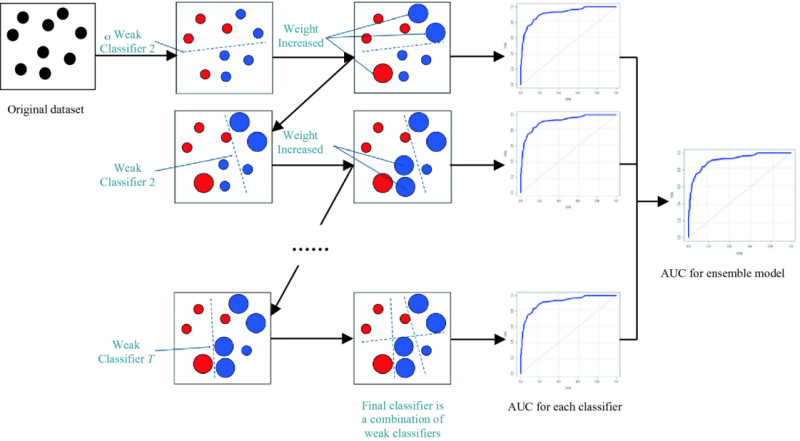

Fuente: https://datascience.eu/machine-learning/gradient-boosting-what-you-need-to-know/

#### Algoritmo Adaboost

**Características**

* Se inicia con un muestreo de datos (es decir, una sub-muestra) que es recogida mediante muestreo aleatorio con reemplazo --> parámetro ***subsample*** en scikit-learn

* 

Fuente: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

Conclusión clave: Adaboost crea nuevos clasificadores al influir continuamente en la distribución de los datos muestreados para entrenar a cada ***learner*** sucesivo.

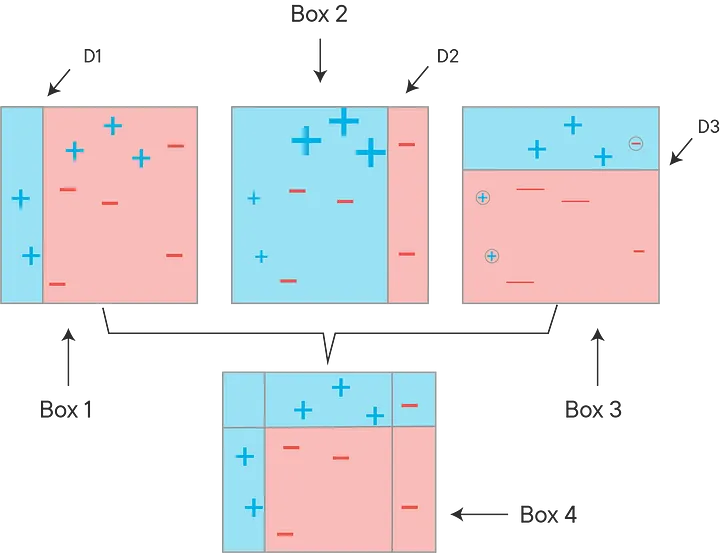



#### Gradient Boosting

**Función de pérdida o función de error (Loss function)**

* Calcula el error entre lo que predices y lo que realmente es

**Gradiente descendente**

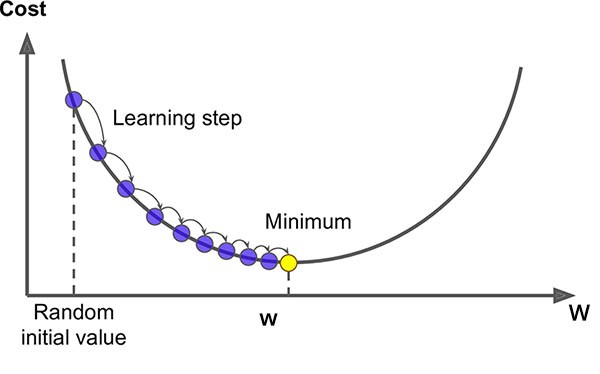

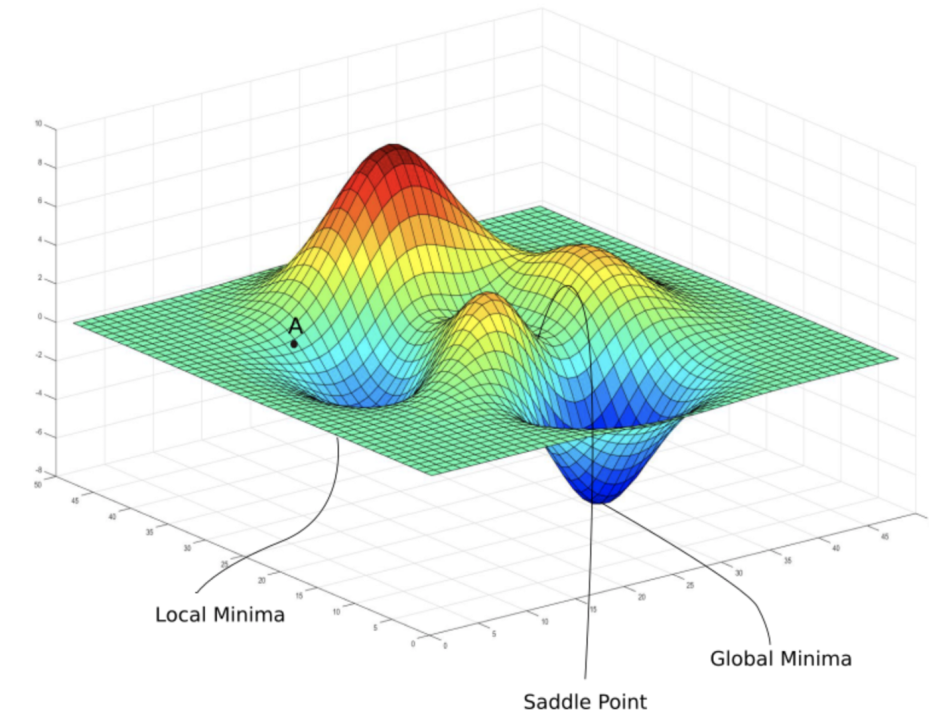

#### Código: Implementación del Gradiente Descendente Manual

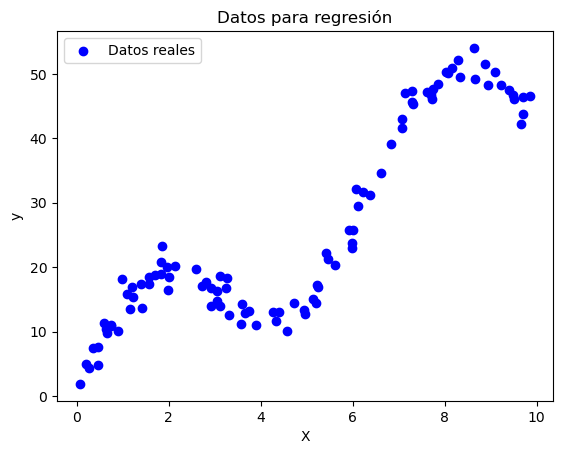

Iteración 1
Error cuadrático medio: 584.8857
----------------------------------------
Iteración 2
Error cuadrático medio: 376.5015
----------------------------------------
Iteración 3
Error cuadrático medio: 243.0694
----------------------------------------
Iteración 4
Error cuadrático medio: 157.5554
----------------------------------------
Iteración 5
Error cuadrático medio: 102.6009
----------------------------------------


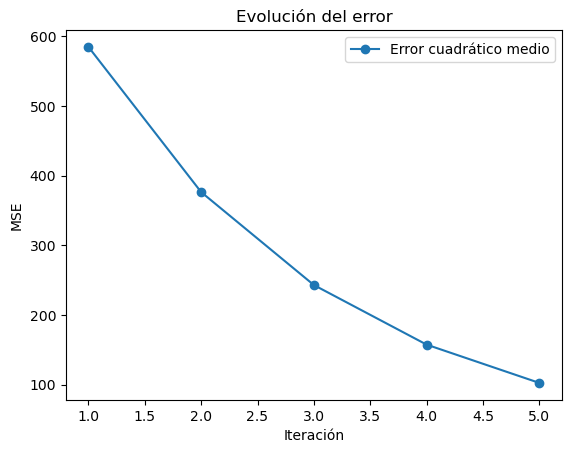

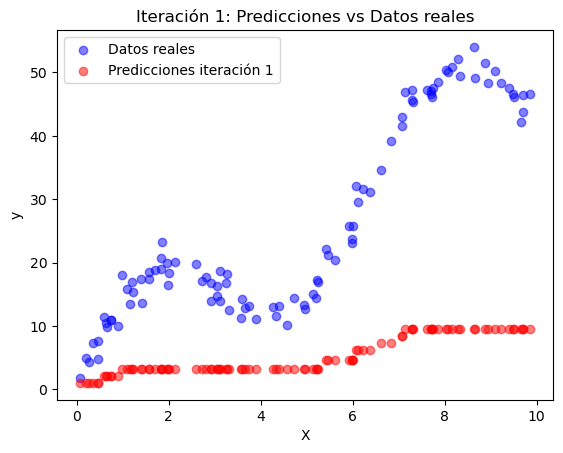

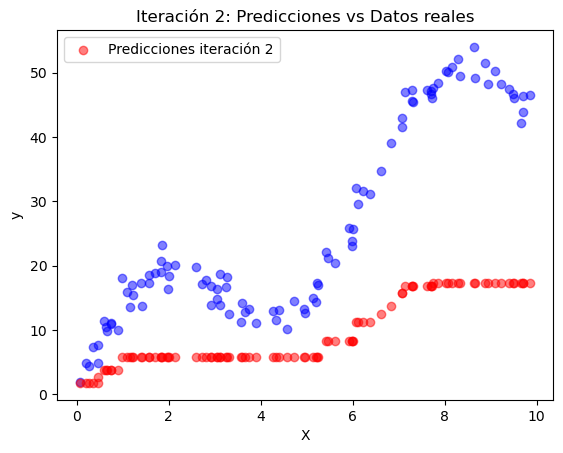

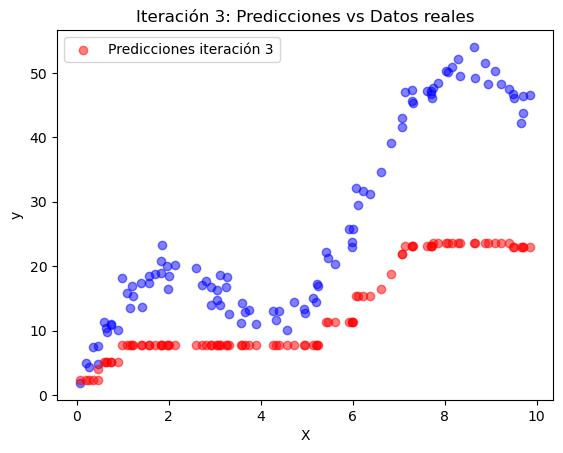

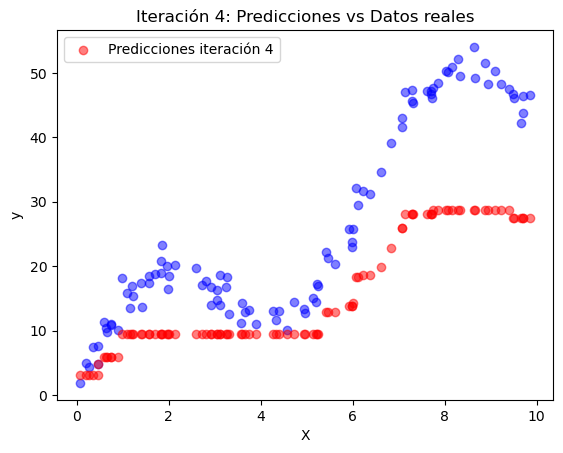

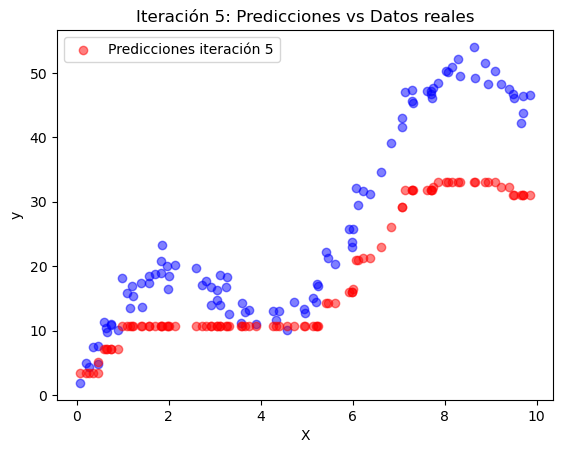

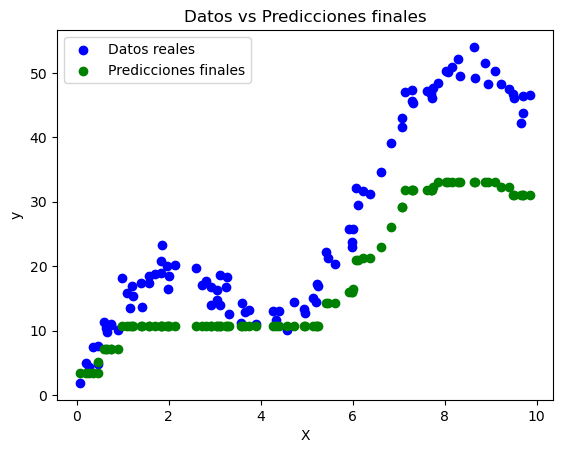

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Crear un conjunto de datos simple
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Una característica, valores entre 0 y 10
y = 5 * X[:, 0] + np.sin(X[:, 0]) * 10 + np.random.randn(100) * 2  # Relación no lineal con ruido

# Visualizar los datos
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos para regresión')
plt.legend()
plt.show()

# Configuración inicial
n_iterations = 5
learning_rate = 0.2  # Tasa de aprendizaje
predictions = np.zeros_like(y)  # Predicciones iniciales

# Listas para guardar modelos, errores y predicciones en cada iteración
models = []
errors = []
predictions_per_step = []

# Gradiente Boosting manual paso a paso
for i in range(n_iterations):
    # Calcular los residuos para la iteración anterior (con la excepción de la 1era iteración)
    residuals = y - predictions

    # Ajustar un weak learner (árbol de decisión) a los residuos
    model = DecisionTreeRegressor(max_depth=3, random_state=42)
    # Actualizo el modelo usando los residuos calculados para la iteración anterior
    model.fit(X, residuals)
    models.append(model)

    # Actualizar las predicciones
    update = model.predict(X)
    predictions += learning_rate * update

    # Guardar las predicciones y el error
    predictions_per_step.append(predictions.copy())
    mse = np.mean((y - predictions) ** 2)
    errors.append(mse)

    # Mostrar información de la iteración
    print(f"Iteración {i + 1}")
    print(f"Error cuadrático medio: {mse:.4f}")
    print("-" * 40)

# Visualizar el error a lo largo de las iteraciones
plt.plot(range(1, n_iterations + 1), errors, marker='o', label='Error cuadrático medio')
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.title('Evolución del error')
plt.legend()
plt.show()

# Visualizar las predicciones en cada iteración
for i, step_predictions in enumerate(predictions_per_step, start=1):
    plt.scatter(X, y, color='blue', alpha=0.5, label='Datos reales' if i == 1 else "")
    plt.scatter(X, step_predictions, color='red', alpha=0.5, label=f'Predicciones iteración {i}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Iteración {i}: Predicciones vs Datos reales')
    plt.legend()
    plt.show()

# Visualizar las predicciones finales
plt.scatter(X, y, color='blue', label='Datos reales')
plt.scatter(X, predictions, color='green', label='Predicciones finales')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos vs Predicciones finales')
plt.legend()
plt.show()

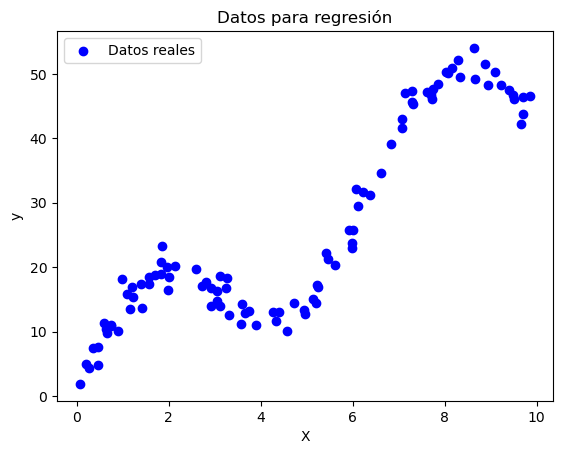

Iteración 1
Error absoluto medio: 20.7668
----------------------------------------
Iteración 2
Error absoluto medio: 16.6134
----------------------------------------
Iteración 3
Error absoluto medio: 13.3000
----------------------------------------
Iteración 4
Error absoluto medio: 10.6580
----------------------------------------
Iteración 5
Error absoluto medio: 8.5501
----------------------------------------


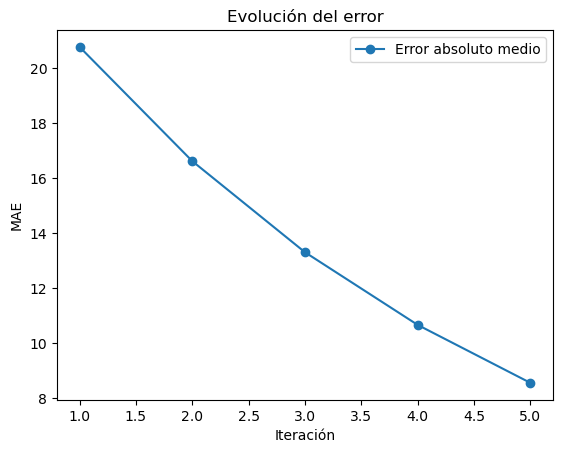

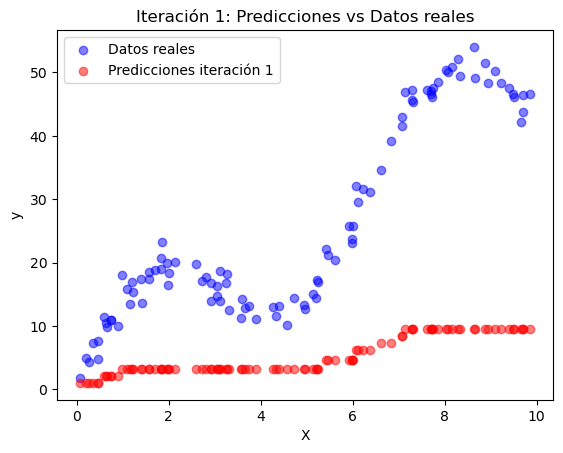

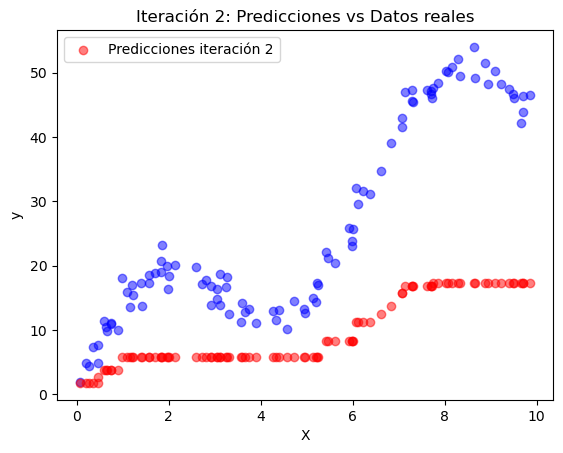

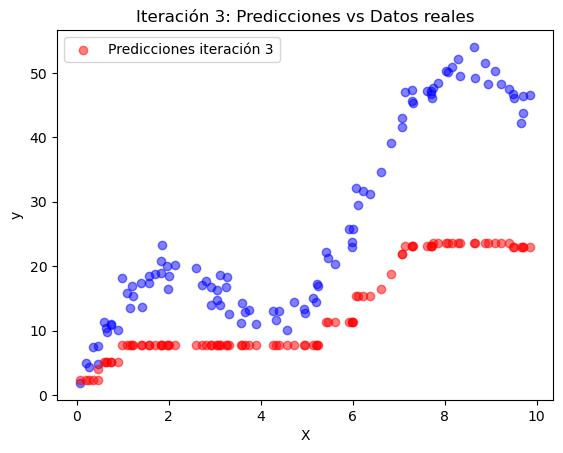

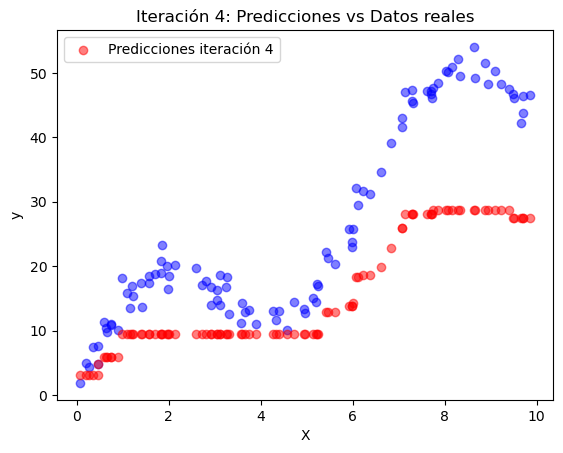

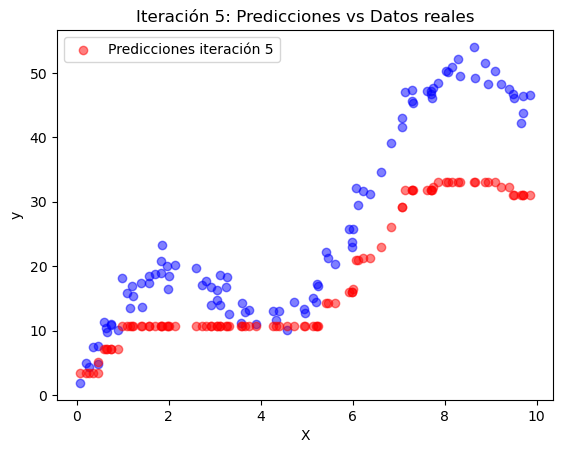

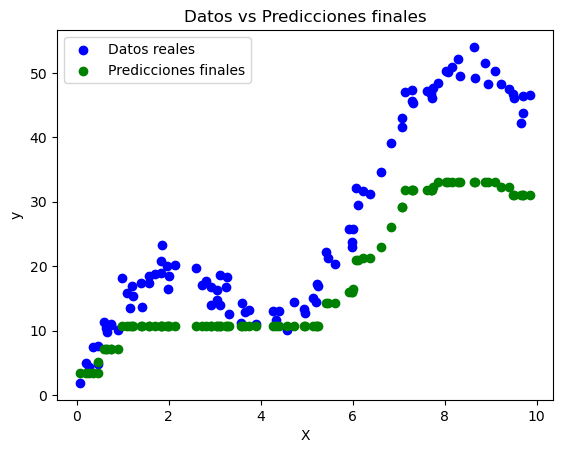

In [15]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Crear un conjunto de datos simple
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Una característica, valores entre 0 y 10
y = 5 * X[:, 0] + np.sin(X[:, 0]) * 10 + np.random.randn(100) * 2  # Relación no lineal con ruido

# Visualizar los datos
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos para regresión')
plt.legend()
plt.show()

# Configuración inicial
n_iterations = 5
learning_rate = 0.2  # Tasa de aprendizaje
predictions = np.zeros_like(y)  # Predicciones iniciales

# Listas para guardar modelos, errores y predicciones en cada iteración
models = []
errors = []
predictions_per_step = []

# Gradiente Boosting manual paso a paso
for i in range(n_iterations):
    # Calcular los residuos para la iteración anterior (con la excepción de la 1era iteración)
    residuals = y - predictions

    # Ajustar un weak learner (árbol de decisión) a los residuos
    model = DecisionTreeRegressor(max_depth=3, random_state=42)
    # Actualizo el modelo usando los residuos calculados para la iteración anterior
    model.fit(X, residuals)
    models.append(model)

    # Actualizar las predicciones
    update = model.predict(X)
    predictions += learning_rate * update

    # Guardar las predicciones y el error
    predictions_per_step.append(predictions.copy())
    mae = np.mean(abs(y - predictions))
    errors.append(mae)

    # Mostrar información de la iteración
    print(f"Iteración {i + 1}")
    print(f"Error absoluto medio: {mae:.4f}")
    print("-" * 40)

# Visualizar el error a lo largo de las iteraciones
plt.plot(range(1, n_iterations + 1), errors, marker='o', label='Error absoluto medio')
plt.xlabel('Iteración')
plt.ylabel('MAE')
plt.title('Evolución del error')
plt.legend()
plt.show()

# Visualizar las predicciones en cada iteración
for i, step_predictions in enumerate(predictions_per_step, start=1):
    plt.scatter(X, y, color='blue', alpha=0.5, label='Datos reales' if i == 1 else "")
    plt.scatter(X, step_predictions, color='red', alpha=0.5, label=f'Predicciones iteración {i}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Iteración {i}: Predicciones vs Datos reales')
    plt.legend()
    plt.show()

# Visualizar las predicciones finales
plt.scatter(X, y, color='blue', label='Datos reales')
plt.scatter(X, predictions, color='green', label='Predicciones finales')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos vs Predicciones finales')
plt.legend()
plt.show()

### Ejemplo en código usando GradientBoostingClassifier de la librería de sklearn para un problema de clasificación

Fuente: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [17]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Generar un conjunto de datos de ejemplo
from sklearn.datasets import make_classification

# Crear un conjunto de datos sintético
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear y entrenar un modelo de Gradient Boosting
model = GradientBoostingClassifier(
    n_estimators=100,  # Número de árboles (learners débiles son árboles de decisión en esta implementación)
    learning_rate=0.1, # Tasa de aprendizaje --> cuánto aprendizaje de lo obtenido en la iteración incorporo
    max_depth=3,       # Profundidad máxima de los árboles
    random_state=42    # Semilla para reproducibilidad, pues fija el punto de partida
    # Dos parámetros que nos entregan para mover las métricas que vamos a optimizar
    # loss --> la función de pérdida a ser optimizada
    # criterion  --> la función para medir la calidad de splits en los árboles
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")

# Mostrar un reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Exactitud del modelo: 0.88
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       132
           1       0.86      0.89      0.88       118

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



## Overfitting

### ¿Cómo detectar si hay Overfitting?

#### División en datos de entrenamiento y prueba

#### Medir el error en ambos conjuntos de datos

### ¿Cómo prevenir?

#### Regularización

Si detectas overfitting, puedes aplicar técnicas de regularización:

* Reducir la complejidad del weak learner: Usa árboles más pequeños (max_depth=2).
* Reducir la tasa de aprendizaje (learning_rate): Ayuda a suavizar el proceso de ajuste.
* Aumentar los datos: Introducir más datos de entrenamiento, si es posible.
* Early Stopping: Detén las iteraciones si el error en prueba deja de mejorar.

## Optimización

### Gridseach

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear un conjunto de datos sintético
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Configurar el modelo base
gb_model = GradientBoostingClassifier(random_state=42)

# Configurar GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,  # Validación cruzada con 5 particiones
    scoring='accuracy',  # Métrica de evaluación
    verbose=1,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ejecutar GridSearchCV para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Exactitud en el conjunto de prueba: {test_accuracy:.2f}")

# Reporte de clasificación
print("Reporte de Clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Exactitud en el conjunto de prueba: 0.94
Reporte de Clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       106
           1       0.93      0.95      0.94        94

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

